# TABLE OF CONTENTS
[I. DATA PREPROCESSING](#I.-DATA-PREPROCESSING)<br>
>  + Load the dataset<br>
>  + Assess data quality<br>
>  + Data cleaning<br>

[II. CUSTOMER SEGMENTATION ANALYSIS](#II.-CUSTOMER-SEGMENTATION-ANALYSIS)
>  + [1. Cohort analysis](#1.-Cohort-analysis)
>  + [2. RFM Segmentation](#2.-RFM-Segmentation)


# <a class="anchor" id="I.">I. DATA PREPROCESSING</a>

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from operator import attrgetter
import matplotlib.colors as mcolors
import datetime as dt
from matplotlib.ticker import FuncFormatter
from sklearn.cluster import KMeans
from sklearn.preprocessing import  StandardScaler
import kaggle
import zipfile
from sklearn.preprocessing import power_transform

In [4]:
#Set the background and fontsize for the graph
sns.set_style('whitegrid')
sns.set_context(rc={
    'axes.titlesize':19,
    'axes.labelsize':17,
    'xtick.labelsize':14,
    'ytick.labelsize':14
})

In [5]:
def thousands(y,pos):
    """
    Function is used to set the tick labels according to user's will
    Function requires 2 parameters: y as a value of tick label and pos as the position of the tick label
    It returns the string representation of the tick labels as what users set
    """
    return  '{:,.0f}K'.format(y*1e-3)

def one_thousand(y,pos):
    """
    Function is used to set the tick labels according to user's will
    Function requires 2 parameters: y as a value of tick label and pos as the position of the tick label
    It returns the string representation of the tick labels as what users set
    """
    return  '{:,.0f}'.format(y)

formatter = FuncFormatter(one_thousand)
formatter2 = FuncFormatter(thousands)

In [6]:
#Set the number representation in the notebook
pd.options.display.float_format='{:,.2f}'.format

In [2]:
#Use API of kaggle to download the dataset
!kaggle datasets download -d nathaniel/uci-online-retail-ii-data-set


  0%|          | 0.00/43.3M [00:00<?, ?B/s]
  2%|2         | 1.00M/43.3M [00:00<00:08, 5.30MB/s]
  5%|4         | 2.00M/43.3M [00:00<00:06, 6.61MB/s]
  7%|6         | 3.00M/43.3M [00:00<00:05, 7.72MB/s]
  9%|9         | 4.00M/43.3M [00:00<00:05, 8.07MB/s]
 12%|#1        | 5.00M/43.3M [00:00<00:04, 8.44MB/s]
 14%|#3        | 6.00M/43.3M [00:00<00:04, 8.62MB/s]
 16%|#6        | 7.00M/43.3M [00:00<00:04, 8.90MB/s]
 18%|#8        | 8.00M/43.3M [00:01<00:04, 9.00MB/s]
 21%|##        | 9.00M/43.3M [00:01<00:03, 9.21MB/s]
 23%|##3       | 10.0M/43.3M [00:01<00:03, 9.38MB/s]
 25%|##5       | 11.0M/43.3M [00:01<00:03, 9.41MB/s]
 28%|##7       | 12.0M/43.3M [00:01<00:03, 9.46MB/s]
 30%|###       | 13.0M/43.3M [00:01<00:03, 9.20MB/s]
 35%|###4      | 15.0M/43.3M [00:01<00:03, 9.59MB/s]
 37%|###6      | 16.0M/43.3M [00:01<00:03, 9.31MB/s]
 39%|###9      | 17.0M/43.3M [00:02<00:02, 9.42MB/s]
 42%|####1     | 18.0M/43.3M [00:02<00:02, 9.51MB/s]
 44%|####3     | 19.0M/43.3M [00:02<00:02, 9.55MB/s]
 

In [4]:
with zipfile.ZipFile('uci-online-retail-ii-data-set.zip','r') as zip_ref:
    zip_ref.extractall('targetdir')

# I. DATA PREPROCESSING

## I.1 Load the dataset

In [8]:
df_opt = pd.read_csv(path+'/'+'online_retail_II.csv', dtype={'Description':'category','Country':'category','Invoice':'category','StockCode':'object','Customer ID':'category'},parse_dates=['InvoiceDate'])

## I.2 Assess data quality

In [9]:
df_opt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  category      
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  category      
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   category      
 7   Country      1067371 non-null  category      
dtypes: category(4), datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 44.5+ MB


+ There are around 1 million of rows and 8 columns.<br>
+ The data type for each column seems to be appropriate 


In [106]:
df_opt.describe(include='all')

C:\Users\ADMIN\AppData\Local\Temp/ipykernel_8568/1438037359.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_opt.describe(include='all')


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
count,1067371,1067371,1062989,"1,067,371.00",1067371,"1,067,371.00",824364,1067371
unique,53628,5305,5698,NaN,47635,NaN,5942,43
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2010-12-06 16:57:00,NaN,17841.0,United Kingdom
freq,1350,5829,5918,NaN,1350,NaN,13097,981330
first,NaN,NaN,NaN,NaN,2009-12-01 07:45:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.94,NaN,4.65,NaN,NaN
std,NaN,NaN,NaN,172.71,NaN,123.55,NaN,NaN
min,NaN,NaN,NaN,"-80,995.00",NaN,"-53,594.36",NaN,NaN
25%,NaN,NaN,NaN,1.00,NaN,1.25,NaN,NaN


There exist negative values in some positive variables( Quantity, Price)

## I.3 Clean data 

### I.3.1 handle missing values

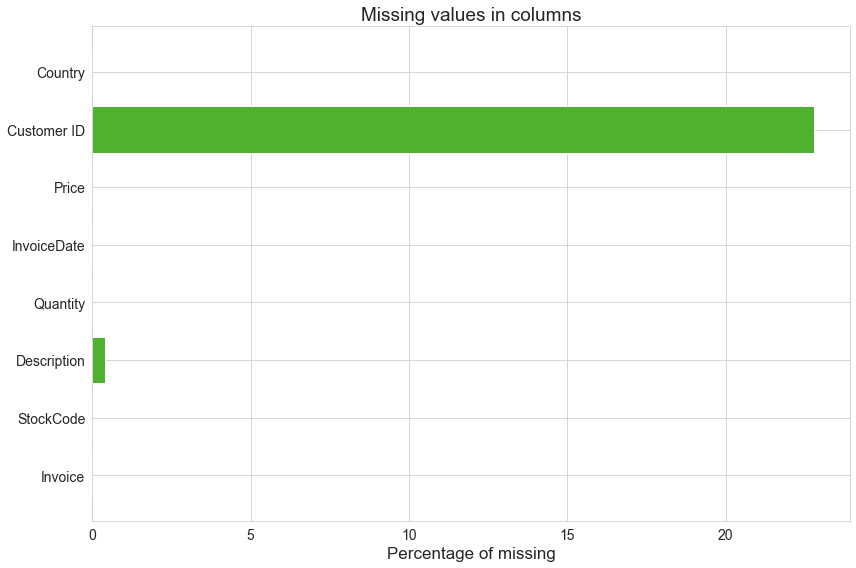

In [8]:
fig, ax= plt.subplots(1,1, figsize=(12,8))
missing_values= df_opt.isnull().sum(axis=0).to_frame().reset_index()
missing_values.columns=['Names','Number of missing values']
ax.barh(missing_values['Names'],(missing_values['Number of missing values']/len(df_opt.iloc[:,0]))*100, color=sns.color_palette('husl')[2])
ax.set_xlabel('Percentage of missing')
ax.set_title('Missing values in columns')
plt.tight_layout()
plt.show()

+ There is around 25% of missing values in the Customer ID<br>
+ There is around 1% of missing values in the Product(Description)<br>

In [27]:
df_opt[df_opt['Customer ID'].isnull()].describe(include='all')

C:\Users\ADMIN\AppData\Local\Temp/ipykernel_8568/2710758826.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_opt[df_opt['Customer ID'].isnull()].describe(include='all')


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
count,243007,243007,238625,"243,007.00",243007,"243,007.00",0,243007
unique,8752,5177,4872,NaN,7051,NaN,0,15
top,537434,DOT,DOTCOM POSTAGE,NaN,2010-12-06 16:57:00,NaN,NaN,United Kingdom
freq,1350,1430,1428,NaN,1350,NaN,NaN,240029
first,NaN,NaN,NaN,NaN,2009-12-01 10:52:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 10:26:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.54,NaN,7.95,NaN,NaN
std,NaN,NaN,NaN,98.86,NaN,224.28,NaN,NaN
min,NaN,NaN,NaN,"-9,600.00",NaN,"-53,594.36",NaN,NaN
25%,NaN,NaN,NaN,1.00,NaN,1.66,NaN,NaN


 __For customer ID__:<br>
+ missing values happen in 15 countries in total of 43 countries. However, for the same country having missing values, it also contains non- missing values.<br>
+ missing values happen in both negative and positive "price" from really small to really large<br>
+ missing values happen in some date but on exact those dates, there are also non missing values<br>
+ missing values happen in both negative and positive "quantity"<br>
+ missing values happen in 4872 unique random products<br>

It is safe to conclude that the nul values in Customer ID happen to be missing completely at random which is okay to be removed from the dataset

In [10]:
no_missing=df_opt.dropna(axis=0)

In [12]:
no_missing.isnull() .sum(axis=0)\
                    .to_frame()\
                    .rename({0:'Number of missing values'},axis=1)

,Number of missing values
Invoice,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
Price,0
Customer ID,0
Country,0


After deletion of missing values in Customer ID, there is no missing values in the dataset

### I.3.2 handle duplicated data

Duplicated data are rows having the same invoice number, date, description of the product and the quantity

In [13]:
no_missing.drop_duplicates(inplace=True)

C:\Users\ADMIN\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


### I.3.3 handle outliers
numeric values columns (Quantity, price)

####  handle outliers due to entry error

As noted when doing data quality assesssment, we spotted some negative values in columns being sensible only when taking on positive values(i.e: Quantity, Price. An order should  have at least 1 quantity and price >0).<br> 
So, the negative and 0 values we saw in the dataframe  could very likely be the mistake when inputting the data in the first place. For data entry errors outliers like these, they could be dropped

In [15]:
#Set the conditions
con_q= no_missing['Quantity']>0
con_p= no_missing['Price']>0
#no_missing_no_unreal = pd.DataFrame(no_missing[(con_q) & (con_p)],columns=no_missing.columns,index=no_missing.index)

In [16]:
no_missing_no_unreal = pd.DataFrame(no_missing[(con_q) & (con_p)])

#### handle other types of outliers

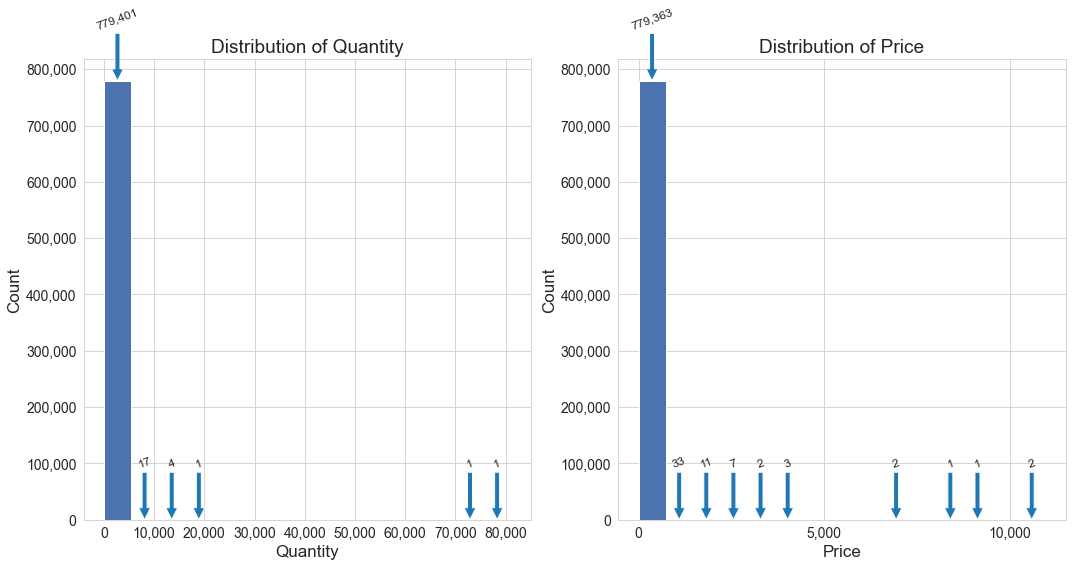

In [17]:
# Visualize the marginal distribution of quantity and price columns
fig,ax= plt.subplots(1,2,figsize=(15,8))
col_names='Quantity Price'.split(' ')
for names, subplot in zip(col_names,ax.flatten()):
    subplot.hist(no_missing_no_unreal[names],bins=15, color=sns.color_palette('deep')[0])
    subplot.yaxis.set_major_formatter(formatter)
    subplot.xaxis.set_major_formatter(formatter)
    plt.locator_params(axis='x',nbins=3)        
    for p in subplot.patches:
        if (p.get_height()>0):
            subplot.annotate(  '{:,.0f}'.format(p.get_height()),
                               xy=(p.get_x()+p.get_width()/2, p.get_height()),
                               xytext=(0,50),
                               xycoords='data',
                               textcoords='offset points', size=12, ha='center',va='bottom',rotation=20,
                               arrowprops=dict(width=5))
        subplot.set_xlabel(names)
        subplot.set_ylabel('Count')
        subplot.set_title('Distribution of '+names)
plt.tight_layout()
plt.show()

From the histogram in the EDA process, we can see that variable "Quantity" and "Price" have outliers with extraordinary large numbers. So I apply clipping to these two columns. 

In [18]:
def clipping(col):
    """
    Function is used to do the clipping: Setting the thresholds for clipping to be at 5th and 95th quantiles
    Function requires parameter col series 
    It returns the columns whose values exceeding the thresholds clipped
    """
    return np.clip(col,np.quantile(col,.05),np.quantile(col,.95))

In [19]:
for col in col_names:
    no_missing_no_unreal['clipped_'+col]=clipping(no_missing_no_unreal[col])

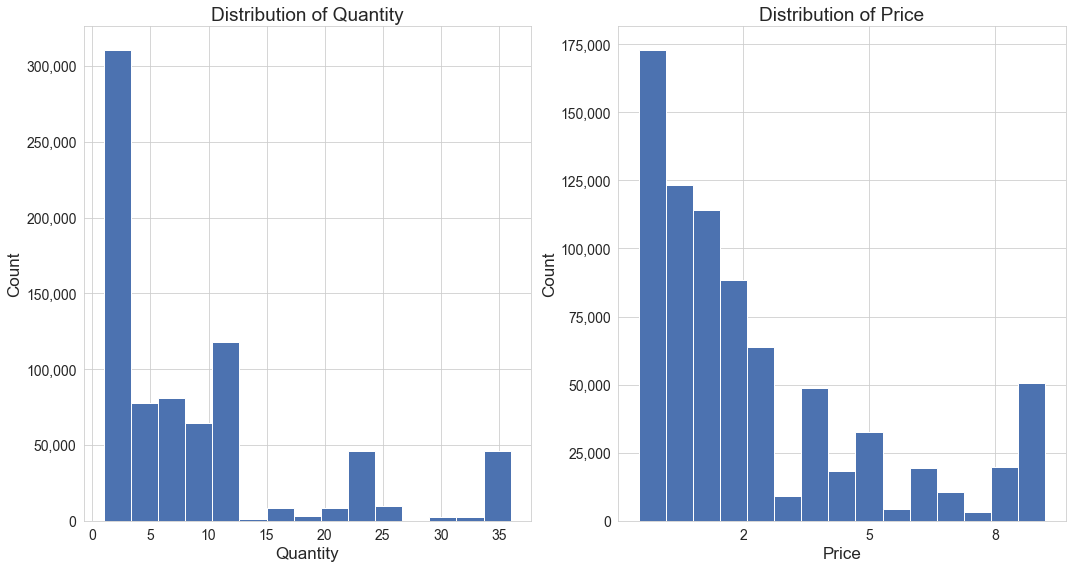

In [20]:
# Visualize the marginal distribution of quantity and price columns
fig,ax= plt.subplots(1,2,figsize=(15,8))
col_names='Quantity Price'.split(' ')
for i, names in enumerate(col_names):
    ax[i].hist(no_missing_no_unreal['clipped_'+names],bins=15, color=sns.color_palette('deep')[0])
    ax[i].yaxis.set_major_formatter(formatter)
    ax[i].xaxis.set_major_formatter(formatter)
    plt.locator_params(axis='x',nbins=3)
    ax[i].set_xlabel(names)
    ax[i].set_ylabel('Count')
    ax[i].set_title('Distribution of '+names)
plt.tight_layout()    
plt.show()

In [21]:
#Rename to a shorter name
used_df = no_missing_no_unreal

In [166]:
#Save the cleaned dataset to a csv file
used_df.to_csv('used_df.csv')

In [22]:
#Load the cleaned dataset 
used_df= pd.read_csv(path+'/'+'used_df.csv',dtype={'Customer ID':'category'},parse_dates=['InvoiceDate'])

used_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779425 entries, 0 to 779424
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Unnamed: 0        779425 non-null  int64         
 1   Invoice           779425 non-null  int64         
 2   StockCode         779425 non-null  object        
 3   Description       779425 non-null  object        
 4   Quantity          779425 non-null  int64         
 5   InvoiceDate       779425 non-null  datetime64[ns]
 6   Price             779425 non-null  float64       
 7   Customer ID       779425 non-null  category      
 8   Country           779425 non-null  object        
 9   clipped_Quantity  779425 non-null  float64       
 10  clipped_Price     779425 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 61.1+ MB


C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


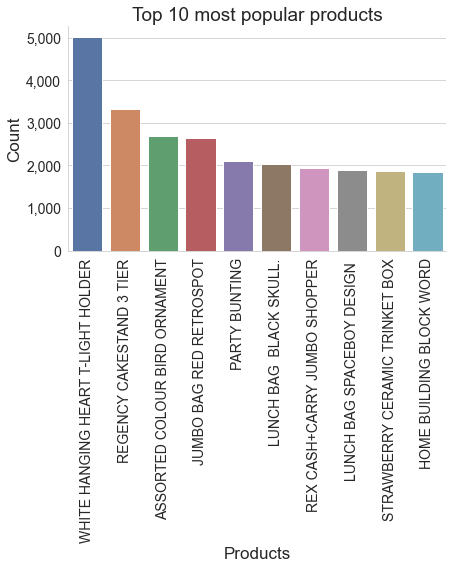

In [23]:
#Top 10 most popular products
top10= used_df  .groupby('Description')['Invoice']\
                .agg('count')\
                .reset_index()\
                .sort_values('Invoice',ascending=False)\
                .head(10)

g= sns.FacetGrid(data=top10,height=8,aspect=.8)
g.map(sns.barplot,'Description','Invoice',palette=sns.color_palette('deep'))
g.set_axis_labels('Products','Count')
g.set(title='Top 10 most popular products')
g.set_xticklabels(rotation=90)
g.axes[0][0].yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

From the plot, we could spot that "__white hanging heart-T-light-holder__" is the most popular products ordered 5000 times

Let's observe the distribution of number of orders per customers

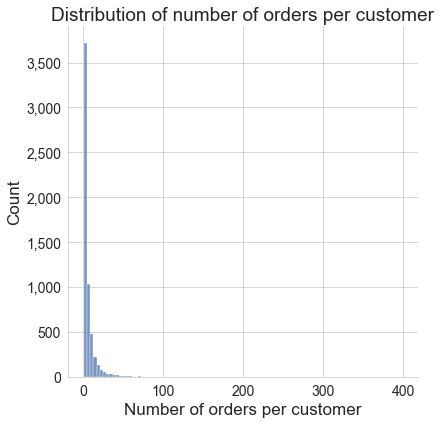

In [25]:
g= sns.FacetGrid(data=num_orders.to_frame(),height=6)
g.map(sns.histplot,'Invoice', bins=100, color=sns.color_palette('deep')[0])
g.set_axis_labels('Number of orders per customer')
g.axes[0][0].yaxis.set_major_formatter(formatter)
g.set(title='Distribution of number of orders per customer')
plt.tight_layout()
plt.show()

There are some cases of customers ordering more than 50 times.

# II. CUSTOMER SEGMENTATION ANALYSIS

## 1. Cohort analysis 
(time cohort)

Firstly, let's run a check to see if there exists any retention in the dataset we are working on:

In [24]:
num_orders= used_df.groupby('Customer ID')['Invoice'].nunique()
repeat_purchase= (sum(num_orders>1)/len(num_orders))*100
print('{}% of customers ordered more than once'.format(repeat_purchase))

72.38856753997959% of customers ordered more than once


Okay, that is great. There seems to have some retention for further investigation

__Objective__:<br>
The idea of cohort analysis conducted in this context is to learn the retention of the online retail business. The retention matrix heatmap would help us have a better understanding the retention metric.<br>
__So, let's construct the heatmap of interest__:<br> 
It incorporates the cohorts(i.e: the date of the first purchase in this dataset) as rows, the number of months after the first purchases as columns, and the percentatage of customers returning to the business as the values in the cells.

In [28]:
#Create the cohort column
used_df['cohort']=used_df.groupby('Customer ID')['InvoiceDate']\
                         .transform('min')\
                         .dt.to_period('M')

#Create the MonthOfPurchase column
used_df['MonthOfPurchase']=used_df['InvoiceDate'].dt.to_period('M')

#Compute the unique number of customers returning to the business in each period 
pivotTable= used_df .groupby(['cohort','MonthOfPurchase'])\
                    .agg(n_unique_customers=('Customer ID','nunique'))\
                    .reset_index()

#Compute the period column
pivotTable['period']=(pivotTable['MonthOfPurchase']-pivotTable['cohort']).apply(attrgetter('n'))

pivotTable.head()

,cohort,MonthOfPurchase,n_unique_customers,period
0,2009-12,2009-12,955,0
1,2009-12,2010-01,337,1
2,2009-12,2010-02,319,2
3,2009-12,2010-03,406,3
4,2009-12,2010-04,363,4


In [29]:
#Reshape the dataframe to form the retention matrix
retention_matrix=pivotTable.pivot(   index='cohort',
                                     columns='period',
                                     values='n_unique_customers')

#Convert the absolute values in cells to rates
retention_rate= retention_matrix.divide(retention_matrix.iloc[:,0],axis=0)

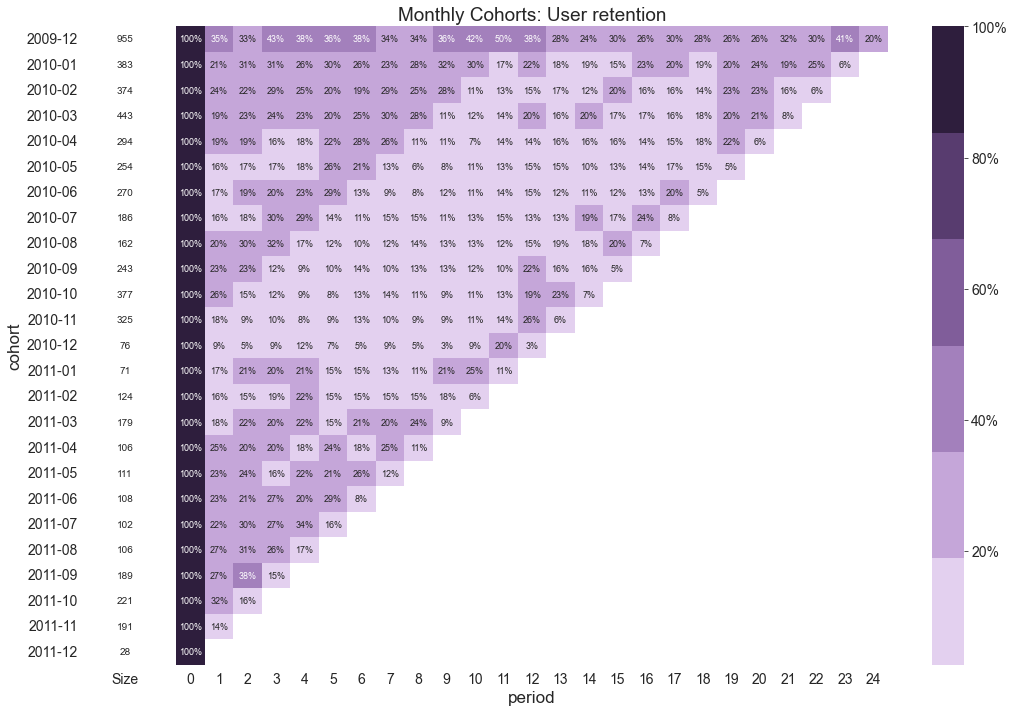

In [30]:
#Visualize the user retention
fig,ax= plt.subplots(1,2,sharey=True,gridspec_kw=dict(width_ratios=[1,11]),figsize=(15,10))
sns.heatmap(data=retention_rate,
            cmap=sns.color_palette('ch:s=.2,r=0.025'),
            annot=True,
            fmt='.0%',
            annot_kws={'size':9},
            cbar=True,
            ax=ax[1])
ax[1].set_title('Monthly Cohorts: User retention')
ax[1].set_ylabel('')
white_cmap= mcolors.ListedColormap(['white'])
sns.heatmap(data=retention_matrix.iloc[:,0].to_frame().rename({0:'Size'},axis=1),
            cmap=white_cmap,
            annot=True,
            fmt='g',
            cbar=False,
            ax=ax[0])
cbar=ax[1].collections[0].colorbar
cbar.set_ticks(np.arange(0,1.1,0.2))
cbar.set_ticklabels('0% 20% 40% 60% 80% 100%'.split(' '))
plt.tight_layout()
plt.show()

__From the retention matrix above we could spot that__:<br>
> - There is a slump in the second month in almost every cohort (i.e: 80% of customers do not make puchase in the second month).<br>

> For the first cohort:
> - The user behaviors in the first cohort is an exception when the percentage of users returning to our business every month is higher than others (i.e: around 30%). A rough guess here could be that these are some close customers who joined the platform from day one and have some existing connections with the retailer before <br>
> - In the 11th month(i.e: the 11th month of the first year) and the 23th month(i.e: the 11th month of the second year), there are around 50% of customers in this cohort return to us. This could be becasue some customers in the first cohort has a rather clear behavior of periodic purchases

__Recommendations__:<br>

> For other cohorts: do further inspection by incorporating other sources of data which is not in the scope of this project. If I have access to more resources, I could try to detect:<br>
> + Whether the customers churn or just because they have not made their next purchase. This could be answered by extending the timeframe to e.g 2012, 2013 when analyzing <br>
> + If they actually churn, it could either be because they are not the target customers we aimed to acquire in the first place or because these customers had terrible experiences with out platform(i.e: technical problems, slowness, etc). Demographic and psychographic data for further segmentation could be helpful to explore the first concern and technical check, A/B testing(e.g difference in the responsive time of our platform to customers requests) could help shed some light on the second

> For the first cohort: try to cement relationship with them <br>

## 2. RFM segmentation
(RFM stands for Recency, Frequency, and Monetary value)

To segment customers, there are some metrics that we can use:<br>
+ Recency: when the customer buy the product for last time<br>
+ Frequency: how frequent the customer buy the product<br> 
+ Monetary value: how much the customer pays for the product


In [31]:
#Convert InvoiceDate to date only
used_df['InvoiceDateOnly']=pd.to_datetime(used_df['InvoiceDate'].dt.date)

#Create the total sum column
used_df['TotalSum']= used_df['clipped_Quantity']*used_df['clipped_Price']

#Create snapshot_date
snapshot_date=used_df['InvoiceDate'].max()+dt.timedelta(days=1)

#Aggregate data by customer ID
customers=used_df.groupby('Customer ID')\
                 .agg({'InvoiceDateOnly': lambda x:(snapshot_date-x.max()).days,
                       'InvoiceDate':'count',
                       'TotalSum':'sum'})\
                 .reset_index()

#Rename columns            
customers.columns=['Customer ID','Recency','Frequency','MonetaryValue']

customers.head()

,Customer ID,Recency,Frequency,MonetaryValue
0,12346.0,326,34,410.30
1,12358.0,2,77,"3,135.77"
2,12359.0,58,362,"6,936.10"
3,12361.0,288,29,485.25
4,12362.0,4,267,"4,915.24"


### 2.1 Data transformation

I would apply K-means to cluster the customers on the basis of these three metrics (RFM). To ensure K-means algorithm function properly, it should meet the assumptions.<br>
The K-Means assumption that could be checked before hand is that:<br> 
+ All variables should have the same variance<br>


In [38]:
customers.var()

C:\Users\ADMIN\AppData\Local\Temp/ipykernel_14760/3155097302.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  customers.var()


Recency             43,829.08
Frequency          117,094.06
MonetaryValue   43,827,087.22
dtype: float64

Variance among variables are different. The idea is to apply StandardScaler to achive unit variance for all columns.<br>
In order to do so, firstly, we have to ensure the distribution of columns are not distorted

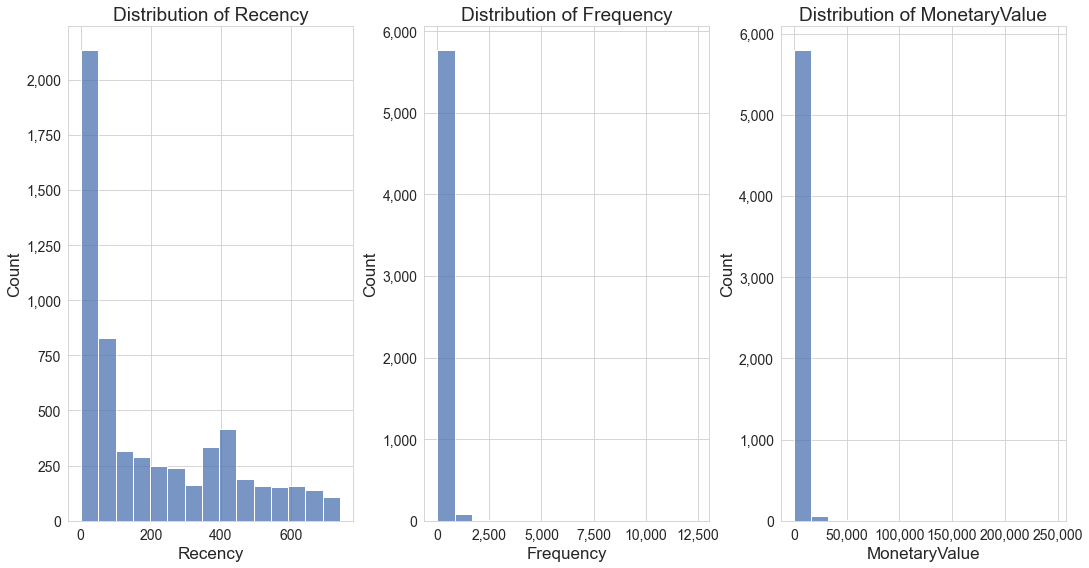

In [139]:
fig, ax= plt.subplots(1,3,figsize=(15,8))
col_names=customers.drop('Customer ID',axis=1).columns
for col,subplot in zip(col_names, ax.flatten()):
    sns.histplot(customers[col],ax=subplot, bins=15, color=sns.color_palette('deep')[0])
    subplot.yaxis.set_major_formatter(formatter)
    subplot.xaxis.set_major_formatter(formatter)
    subplot.set_xlabel(col)
    subplot.set_ylabel('Count')
    subplot.set_title('Distribution of '+col)
plt.tight_layout()
plt.show()    

The plot shows some rather skewed distributions for three metrics.<br>
=>we could do some transformation to reduce skewness before applying Standardization

In [32]:
#box-cox
bc= power_transform(customers.drop('Customer ID',axis=1),method='box-cox')
bc_df= pd.DataFrame(bc,columns='Recency Frequency MonetaryValue'.split(' '))

#square root transformation
sr= np.sqrt(customers.drop('Customer ID',axis=1))
sr_df= pd.DataFrame(sr,columns='Recency Frequency MonetaryValue'.split(' '))

#log transformation
lo= np.log(customers.drop('Customer ID',axis=1))
lo_df= pd.DataFrame(lo,columns='Recency Frequency MonetaryValue'.split(' '))

print('Skewness left after applying box-cox transformation')
print(bc_df.skew())
print()
print('Skewness left after applying square root transformation')
print(sr_df.skew())
print()
print('Skewness left after applying log transformation')
print(lo_df.skew())

Skewness left after applying box-cox transformation
Recency         -0.12
Frequency        0.00
MonetaryValue    0.00
dtype: float64

Skewness left after applying square root transformation
Recency         0.36
Frequency       3.08
MonetaryValue   3.78
dtype: float64

Skewness left after applying log transformation
Recency         -0.55
Frequency       -0.23
MonetaryValue   -0.01
dtype: float64


Given the skewness being the closest to 0, we could say that box cox performed the best. Let's visualize the distributions of the metrics again after being box-cox transformed and standardized

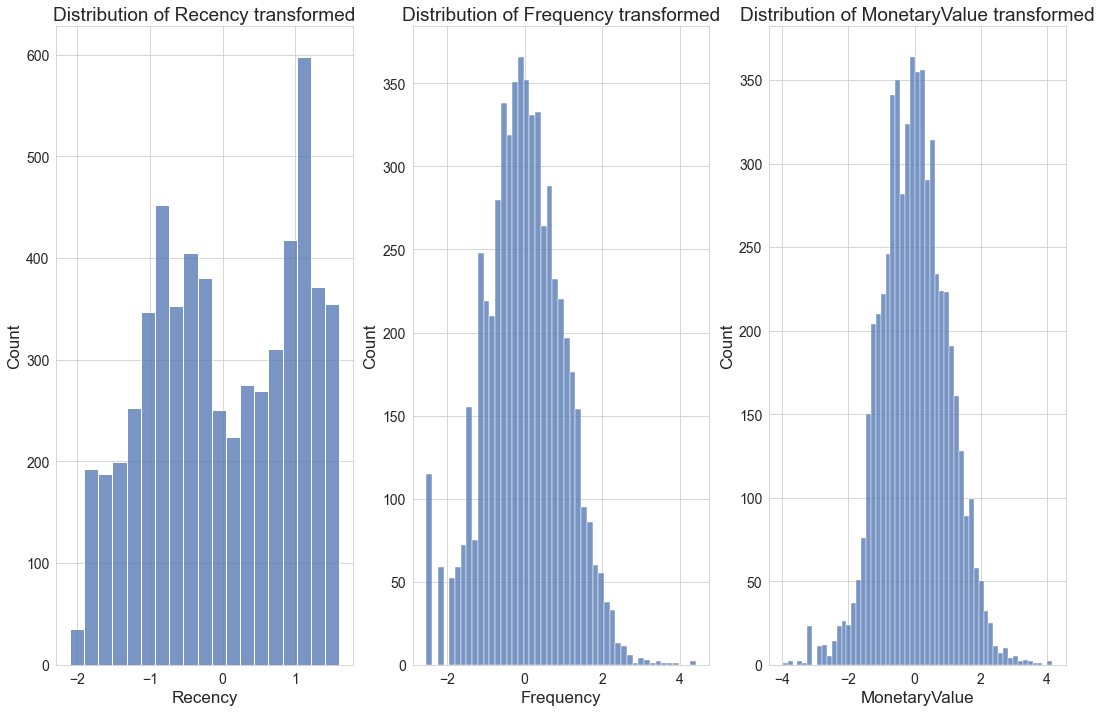

In [33]:
fig, ax= plt.subplots(1,3, figsize=(15,10))
for col, subplot in zip(bc_df.columns, ax.flatten()):
    sns.histplot(bc_df[col], color=sns.color_palette('deep')[0],ax=subplot)
    subplot.yaxis.set_major_formatter(formatter)
    subplot.set_title('Distribution of '+col+' transformed')
plt.tight_layout()
plt.show()

Great, it worked properly. These distribution looks rather normal<br>
Values for each Metric have also been standardized to be on the same scale

In [34]:
bc_df.var()

Recency         1.00
Frequency       1.00
MonetaryValue   1.00
dtype: float64

In [35]:
bc_df.mean()

Recency         0.00
Frequency       0.00
MonetaryValue   0.00
dtype: float64

In [36]:
#Rename the dataframe to be more descriptive
fully_transformed=bc_df

Now, let's apply K-Means algorithm for clustering

### 2.2 K-Means clustering

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


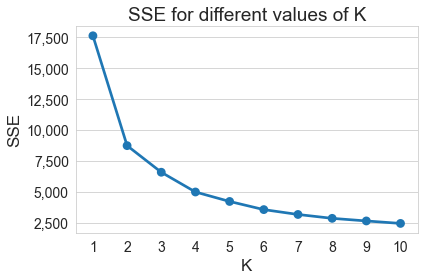

In [37]:
# Apply elbow method to tune the hyperparameter K for the algorithm
sse= {}

for k in np.arange(1,11):
    kmeans= KMeans(n_clusters=k,random_state=0)
    kmeans.fit(fully_transformed)
    sse[k]=kmeans.inertia_
ax= plt.gca()
sns.pointplot(list(sse.keys()), list(sse.values()))
ax.set_xlabel('K')
ax.set_ylabel('SSE')
ax.set_title('SSE for different values of K')
ax.yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

From the plot, we say that for K>4, SSE values tend to follow a linear trend. <br> 
So, the best hyperparameter K for our algorithim is 4

In [38]:
#Fit KMeans to the data
model = KMeans(n_clusters=4, random_state=0)
model.fit(fully_transformed)
model.labels_

array([3, 2, 2, ..., 2, 1, 0])

In [40]:
#Add cluster column 
fully_transformed['Cluster']=model.labels_

fully_transformed.groupby('Cluster')\
                 .agg({'Recency':'mean',
                       'Frequency': 'mean',
                       'MonetaryValue':['mean','count']})\

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0         -0.75     -0.14         -0.12  1545
1          0.89     -1.20         -1.19  1393
2         -0.93      1.23          1.23  1443
3          0.83      0.08          0.04  1497

__Check the assumptions of K-Means__: we see a rather equal number of observations in each cluster

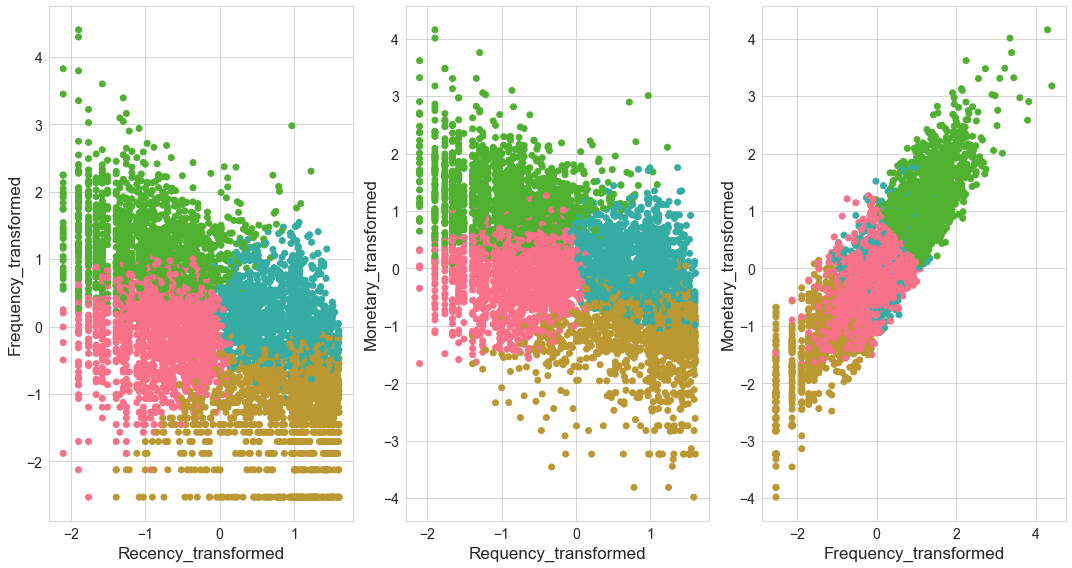

In [47]:
#Plot the clusters
fig,ax=plt.subplots(1,3,figsize=(15,8))
color= dict(enumerate(sns.color_palette('husl')[0:4]))
r= fully_transformed['Recency']
f= fully_transformed['Frequency']
m= fully_transformed['MonetaryValue']
hue= fully_transformed['Cluster']

ax[0].scatter(r,f, c=hue.map(color))
ax[0].set_xlabel('Recency_transformed')
ax[0].set_ylabel('Frequency_transformed')

ax[1].scatter(r,m,c=hue.map(color))
ax[1].set_xlabel('Requency_transformed')
ax[1].set_ylabel('Monetary_transformed')

ax[2].scatter(f,m,c=hue.map(color))
ax[2].set_xlabel('Frequency_transformed')
ax[2].set_ylabel('Monetary_transformed')

plt.tight_layout()
plt.show()

__Check the assumptions of K-Means__:the clusters form spherical shapes which meets the assumption of K-Means

### 2.3 Profile customer segments

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


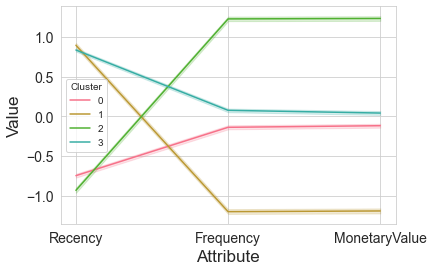

In [51]:
# Add customer ID column
fully_transformed['ID']=customers['Customer ID']

#Melt the dataframe
df_nor_melt=pd.melt(fully_transformed.reset_index(),
                    id_vars=['ID','Cluster'],
                    value_vars='Recency Frequency MonetaryValue'.split(' '),
                    var_name='Attribute',
                    value_name='Value')

#Visualize it
sns.lineplot('Attribute','Value','Cluster',data=df_nor_melt, palette=sns.color_palette('husl')[0:4])
plt.show()

__From the plot above, we could profile each cluster as follows__:<br>
+ On average, Cluster 3 has rather high Recency and average values for Frequency and Monetary 
>Customers belong to this group have been inactive for a rather while<br>
>They bought our product quite often during the time they were active<br>
>They generated a medium level of revenue during the time they were active<br>

=>__*Valuable but hibernating customers*__
+ On average, Cluster 2 has low Recency and really high Frequency and Monetary values
>Customers belonging to this group are the most active to our service<br>
>They bought the product regularly<br>
>They generated the highest level of revenue during the period of 2009-2011<br>

=>__*Loyal customers*__
+ On average, Cluster 1 has the highest Recency values and lowest Frequency and Monetary values
>Customers belonging to this group have been inactive for a rather while<br>
>They did not buy the products often during the time they were active<br>
>They generated the least amount of revenue during time they were active<br>

=>__*Least profitable customers*__
+ Cluster 0 has the rather low Recency values and medium values for Frequency and Monetary 
>Customers belonging to this group are rather active to our service<br>
>They bought the products often during the time they were active<br>
>They generated a medium level of revenue during time they were active<br>

=> __*Valuable and enthusiastic customers*__

__Recommendations__:<br>
The next product and marketing campaigns should aim at customers in clusters: 3, 2, 0<br>

+ For cluster 3: win them back. They seem to get bored of our service but it is worth bringing them back since they generate some non trivial revenues. Some approaches could be: reminders, discounts,  customers feedbacks<br>


+ For cluster 2: strengthen the relationship with them(i.e: maintain three aspects). An approach could be to offer exclusive offers to this cluster<br>


+ For cluster 0: boost their values: A typical approach could be to collect Customer feedback to know more about what they buy, in which occasions, so that we could apply cross sell or up sale strategies.  